# Experiment 2.0



## Set up

In [1]:
notebook_name = 'experiment_2.0'



In [2]:
# Reload functions every time
%load_ext autoreload 
%autoreload 2

In [3]:
# Load libraries
import sys
import os
import pandas as pd
import numpy as np
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Import the variables that have been set in the init.py folder in the root directory
# These include a constant called PROJECT_ROOT which stores the absolute path to this folder
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import init
PROJECT_ROOT = os.getenv("PROJECT_ROOT")

# Add the src folder to sys path, so that the application knows to look there for libraries
sys.path.append(str(Path(PROJECT_ROOT) / 'src'))






## Experiment with fhir.resources

In [4]:
# from https://www.kaggle.com/code/drscarlat/fhir-starter-parse-healthcare-bundles-into-tables/notebook
import json
import fhir.resources
# print(fhir.resources.__path__)

import numpy as np  
import pandas as pd 
import json
from datetime import date
from tqdm.auto import tqdm
tqdm.pandas()

from fhir.resources.bundle import Bundle
from fhir.resources.patient import Patient
from fhir.resources.condition import Condition
from fhir.resources.observation import Observation
from fhir.resources.medicationrequest import MedicationRequest
from fhir.resources.procedure import Procedure
from fhir.resources.encounter import Encounter
from fhir.resources.claim import Claim
from fhir.resources.immunization import Immunization

import os
filesList = os.listdir('../data_store/fhir-1ksample')
print(len(filesList))

983


/Users/zellaking/Repos/synthetic-clinical-notes/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
f = open('../data_store/fhir-1ksample/'+filesList[50],)
json_obj = json.load(f)


# Extract first 3 entries 
extracted_data = {
  "resourceType": json_obj["resourceType"],
  "type": json_obj["type"],
  "entry": json_obj["entry"][:4]
}


len(extracted_data['entry'])

4

In [45]:
# https://claude.ai/chat/e901a5f3-2584-463d-8af3-d1a8bb8e9b12
INVALID_FIELDS = [
    "address",
    "telecom",
    "class",
    "participant.individual", 
    "period",
    "reasonCode",
    "performedPeriod",
    "reasonReference",
    "dosageInstruction",
    "medicationCodeableConcept", 
    "participant.role",
    "encounter",
    "activity.detail",
    "addresses.reference",
    "series.bodySite",
    "series.modality", 
    "contained.__root__.kind",
    "hospitalization"
]
def remove_invalid_fields(obj):
    if isinstance(obj, dict):
        to_remove = []
        for key, value in obj.items():
            if key in INVALID_FIELDS:
                to_remove.append(key)
            else:
                remove_invalid_fields(value)
        for key in to_remove:            
            del obj[key]

    elif isinstance(obj, list):
        for item in obj:
            remove_invalid_fields(item)
    return obj

remove_invalid_fields(extracted_data)

{'resourceType': 'Bundle',
 'type': 'transaction',
 'entry': [{'fullUrl': 'urn:uuid:7e8cd3d5-c1c8-4c23-b499-8c5828cc7d35',
   'resource': {'resourceType': 'Patient',
    'id': '7e8cd3d5-c1c8-4c23-b499-8c5828cc7d35',
    'text': {'status': 'generated',
     'div': '<div xmlns="http://www.w3.org/1999/xhtml">Generated by <a href="https://github.com/synthetichealth/synthea">Synthea</a>.Version identifier: v2.4.0-404-ge7ce2295\n .   Person seed: -5899162848834429728  Population seed: 0</div>'},
    'extension': [{'url': 'http://hl7.org/fhir/us/core/StructureDefinition/us-core-race',
      'extension': [{'url': 'ombCategory',
        'valueCoding': {'system': 'urn:oid:2.16.840.1.113883.6.238',
         'code': '2054-5',
         'display': 'Black or African American'}},
       {'url': 'text', 'valueString': 'Black or African American'}]},
     {'url': 'http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity',
      'extension': [{'url': 'ombCategory',
        'valueCoding': {'syste

In [46]:


oneBundle = Bundle.parse_obj(remove_invalid_fields(json_obj))

# Resources

resources = []
if oneBundle.entry is not None:
    for entry in oneBundle.entry:
        resources.append(entry.resource)


oneResources = []
for j in range(len(resources)):
    oneResources.append(type(resources[j]))
    
print(len(oneResources))

uniqResources = set(oneResources)
print(len(uniqResources))
uniqResources


ValidationError: 20 validation errors for Bundle
entry -> 38 -> resource -> medication
  field required (type=value_error.missing)
entry -> 41 -> resource -> activity -> 0 -> detail
  extra fields not permitted (type=value_error.extra)
entry -> 41 -> resource -> activity -> 1 -> detail
  extra fields not permitted (type=value_error.extra)
entry -> 41 -> resource -> addresses -> 0 -> reference -> __root__
  Invalid json str value has been provided for class <class 'fhir.resources.reference.Reference'> (type=value_error)
entry -> 42 -> resource -> series -> 0 -> bodySite -> code
  extra fields not permitted (type=value_error.extra)
entry -> 42 -> resource -> series -> 0 -> bodySite -> display
  extra fields not permitted (type=value_error.extra)
entry -> 42 -> resource -> series -> 0 -> bodySite -> system
  extra fields not permitted (type=value_error.extra)
entry -> 42 -> resource -> series -> 0 -> modality -> code
  extra fields not permitted (type=value_error.extra)
entry -> 42 -> resource -> series -> 0 -> modality -> display
  extra fields not permitted (type=value_error.extra)
entry -> 42 -> resource -> series -> 0 -> modality -> system
  extra fields not permitted (type=value_error.extra)
entry -> 63 -> resource -> medication
  field required (type=value_error.missing)
entry -> 66 -> resource -> activity -> 0 -> detail
  extra fields not permitted (type=value_error.extra)
entry -> 66 -> resource -> activity -> 1 -> detail
  extra fields not permitted (type=value_error.extra)
entry -> 66 -> resource -> addresses -> 0 -> reference -> __root__
  Invalid json str value has been provided for class <class 'fhir.resources.reference.Reference'> (type=value_error)
entry -> 150 -> resource -> medication
  field required (type=value_error.missing)
entry -> 153 -> resource -> activity -> 0 -> detail
  extra fields not permitted (type=value_error.extra)
entry -> 153 -> resource -> activity -> 1 -> detail
  extra fields not permitted (type=value_error.extra)
entry -> 153 -> resource -> addresses -> 0 -> reference -> __root__
  Invalid json str value has been provided for class <class 'fhir.resources.reference.Reference'> (type=value_error)
entry -> 183 -> resource -> medication
  field required (type=value_error.missing)
entry -> 188 -> resource -> medication
  field required (type=value_error.missing)

In [36]:
json_obj["entry"][25]

{'fullUrl': 'urn:uuid:5d5ac2d3-ab67-40ec-9bd7-6bff2eb44243',
 'resource': {'resourceType': 'ExplanationOfBenefit',
  'id': '5d5ac2d3-ab67-40ec-9bd7-6bff2eb44243',
  'contained': [{'resourceType': 'ServiceRequest',
    'id': 'referral',
    'status': 'completed',
    'intent': 'order',
    'subject': {'reference': 'urn:uuid:7e8cd3d5-c1c8-4c23-b499-8c5828cc7d35'},
    'requester': {'reference': 'urn:uuid:0000016d-3a85-4cca-0000-000000007918'},
    'performer': [{'reference': 'urn:uuid:0000016d-3a85-4cca-0000-000000007918'}]},
   {'resourceType': 'Coverage',
    'id': 'coverage',
    'status': 'active',
    'type': {'text': 'Medicaid'},
    'beneficiary': {'reference': 'urn:uuid:7e8cd3d5-c1c8-4c23-b499-8c5828cc7d35'},
    'payor': [{'display': 'Medicaid'}]}],
  'identifier': [{'system': 'https://bluebutton.cms.gov/resources/variables/clm_id',
    'value': '09f0fb48-0cfa-4c87-9a00-35f26e7597ea'},
   {'system': 'https://bluebutton.cms.gov/resources/identifier/claim-group',
    'value': '999

In [25]:
onePatient = Patient.parse_obj(resources[0])
onePatient.name[0]

# Patient demographics
onePatientID = onePatient.id

print(onePatientID)
print(onePatient.name[0].family)
print(onePatient.name[0].given[0])
print(onePatient.birthDate)
print(onePatient.gender)

7e8cd3d5-c1c8-4c23-b499-8c5828cc7d35
Monroy712
Leonor133
1977-07-18
female


In [27]:
resCondition = []
for j in range(len(resources)):
    if resources[j].__class__.__name__ == 'Condition':
        resCondition.append(resources[j])

resCondition

[]

## Load data

Here the function called ...

In [8]:
FIHR_DIR = '../../privfp-poc-zk/experiments/02_generate_dataset_inpatients/synthea/fhir'
os.listdir(FIHR_DIR)[0]

'Parthenia862_Cole117_de4da970-92c4-0296-0b6c-7d960667d075.json'

In [15]:
import json
import fhir.resources
print(fhir.resources.__path__)
'condition' in os.listdir('/Users/zellaking/Repos/synthetic-clinical-notes/env/lib/python3.11/site-packages/fhir/resources')


['/Users/zellaking/Repos/synthetic-clinical-notes/env/lib/python3.11/site-packages/fhir/resources']


False

In [9]:


with open(FIHR_DIR + '/' + os.listdir(FIHR_DIR)[0]) as f:
   data = json.load(f)
   
   # ed.head()

In [10]:
# bundle = fhir.resources.bundle.Bundle.parse_raw(json.dumps(data))
condition_json = {'resourceType': 'Condition',
 'id': 'bdcfff4d-01c0-e86e-3e19-c323653bb89d',
 'clinicalStatus': {'coding': [{'system': 'http://terminology.hl7.org/CodeSystem/condition-clinical',
    'code': 'active'}]},
 'verificationStatus': {'coding': [{'system': 'http://terminology.hl7.org/CodeSystem/condition-ver-status',
    'code': 'confirmed'}]},
 'code': {'coding': [{'system': 'http://snomed.info/sct',
    'code': '224299000',
    'display': 'Received higher education (finding)'}],
  'text': 'Received higher education (finding)'},
 'subject': {'reference': 'urn:uuid:de4da970-92c4-0296-0b6c-7d960667d075'},
 'encounter': {'reference': 'urn:uuid:cdef6589-a42c-ac0e-beab-55283c1ed7d4'},
 'onsetDateTime': '2005-03-29T10:23:00+01:00',
 'recordedDate': '2005-03-29T10:23:00+01:00'}

condition = fhir.resources.condition.Condition.parse_raw(json.dumps(condition_json))


AttributeError: module 'fhir.resources' has no attribute 'condition'

## Generate 100 instances of a patient with admission notes

Here I pick rows from the A&E dataset at random, and generate admission notes for them. I chose to save these to a json file, rather than to individual text files or to SQL, as this is human readable. You can view the full output [here](../src/data_exports/note_dict_20231002_2120.json)

This uses a class definition called Patient(). To see the script, go to [../src/functions/patient_class.py](../src/functions/patient_class.py) An instance of this class, here referred to as a persona, is a single patient. The instance is populated with the variables retrieved from a single row of the ED dataset loaded above.

The steps are the following:
* select a row from the A&E data
* pass the row information to the class definition

In addition, as part of creating the persona, a call to ChatGPT is made using the OpenAI API. Certain details about the patient (listed below) are embedded into the prompt to be passed in. ChatGPT is asked to generate a medical condition, and an admission note. 

A sub-function [pick_medical_condition()](../src/functions/pick_medical_condition.py) is called to populate three additional attributes of the persona: the diagnosis, their admission note, and their most recent note (which is this case is the admission note, but later this attribute could be something else like a progress note). 

The script [pick_medical_condition()](../src/functions/pick_medical_condition.py)

* calls a function [generate_prompt_presenting_condition()](../src/functions/pick_medical_condition.py) (scroll down the file) which populates a ChatGPT prompt with details about the patient. The prompt contains ChatGPT's instructions and requests the ouput in a json format. To see the text of the prompt, go to [pick_medical_condition.txt](../templates/prompt_templates/pick_medical_condition.txt)
* calls ChatGPT with the prompt. Functions used to call ChatGPT are in [prompt_functions.py](../src/functions/prompt_functions.py)
* attempts to parse the json output

In [6]:
attributes = ['Age_Band', 'AE_Arrive_HourOfDay', 'AE_Time_Mins',  'Length_Of_Stay_Days', 'Title', 
                'Sex', 'IMD_Decile_From_LSOA', 'AE_Num_Diagnoses',
                'AE_Num_Investigations', 'AE_Num_Treatments', 
                'Treatment_Function_Title',
                'Medical_Condition', 'Admission_Note']
note_dict = {}

def row_to_patient(row):
    return Patient(*row)

import numpy as np
np.random.seed(42) 


In [14]:
while len(note_dict.keys()) < 100:

    for index, persona in ed[(~ed.Treatment_Function_Title.isnull()) & 
                             (ed.AE_Num_Diagnoses > 0)].sample(1).iterrows():

        Pat = row_to_patient(persona)

        if Pat.Admission_Note != '' and 'failed on json' not in str(Pat.Admission_Note):

            print("Successful admission note for patient with id " + str(index))
            
            note_dict[Pat.id] = {}
            note_dict[Pat.id] = {attr: getattr(Pat, attr) for attr in attributes if hasattr(Pat, attr)}

        else: 

            print("Failed admission note for patient with id " + str(index))

    if len(note_dict.keys()) % 10 == 0:
        write_to_json(note_dict, notebook_name)

write_to_json(note_dict, notebook_name)

Successful admission note for patient with id 2160001
Failed admission note for patient with id 780334
Successful admission note for patient with id 2087856
Failed admission note for patient with id 962013
Successful admission note for patient with id 731533
Successful admission note for patient with id 1207568
Successful admission note for patient with id 4898222
Failed admission note for patient with id 4598148
Successful admission note for patient with id 4951974
Successful admission note for patient with id 105789
Successful admission note for patient with id 3105051
Successful admission note for patient with id 1220342
Failed admission note for patient with id 2746057
Successful admission note for patient with id 1798924
Successful admission note for patient with id 928773
Successful admission note for patient with id 2989949
Successful admission note for patient with id 1459547
Failed admission note for patient with id 1287304
Successful admission note for patient with id 3592999

## Evaluate output

In [4]:
note_dict = load_from_json(notebook_name)

data = [{'id': id, **persona} for id, persona in note_dict.items()]
output = pd.DataFrame(data)

In [16]:


output['Medical_Condition'] = output['Medical_Condition'].str.lower().str.capitalize()

# Dictionary to map similar terms
similar_terms = {
    'Fractured hip': 'Hip fracture',
    'Fracture of hip': 'Hip fracture',
    'Fractured wrist': 'Fracture of the wrist',
    'Gastroesophageal reflux disease (gerd)': 'Gastroesophageal reflux disease',
    'Gastric ulcer': 'Peptic ulcer disease',
    'Kidney stones': 'Kidney stone',
    'Myocardial infarction': 'Heart attack'
}

# Replace similar terms in the array
data = [similar_terms.get(term, term) for term in output['Medical_Condition']]

# Convert the array back to a Pandas Series
output['Medical_Condition_adj'] = pd.Series(data)



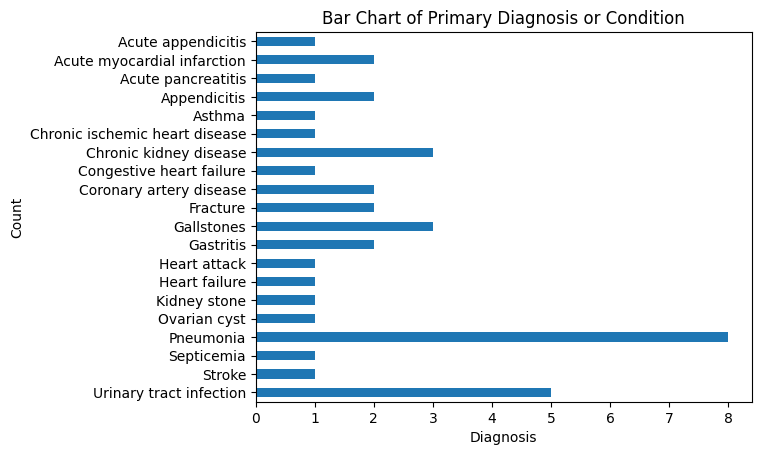

In [17]:

output['Medical_Condition_adj'].value_counts().sort_index(ascending=False).plot(kind='barh')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Bar Chart of Primary Diagnosis or Condition')
plt.show()

### Use LLM for evaluation

In [Experiment 1.0](experiment-1.0.ipynb) I found that the agent wanted to admit people with conditions that did not merit admission. Here I use the agent first tried in [Experiment 1.0.1](experiment-1.0.1.ipynb) to evaluate the admission decision. The text prompt is [verify_admission_decision.txt](../templates/prompt_templates/verify_admission_decision.txt). The agent is given the admission note, and asked to act as a senior colleague to appraise a junior colleague's decision to admit the patient. The agent returns an agree/disagree decision, and a discharge note. (The reason for adding the discharge note was to encourage the LLM to think about how the patient's condition could be managed without admission)

The code below loops through the 100 admission notes, to evaluate whether an admission decision was the right call. An example is below.

In [8]:
agree_count = 0
failed_count = 0
opinion_list = []

for id, persona in note_dict.items():
    opinion, reason, discharge_note = verify_admission_decision(persona['Admission_Note']) 
    opinion_list.append(opinion)

    print(opinion)
    if opinion in ['agree', 'disagree']:
        note_dict[id]['Admission_Note_agreement'] = opinion
        note_dict[id]['Admission_Note_agreement_reason'] = reason
        note_dict[id]['Admission_Note_if_discharged'] = discharge_note

        if opinion == 'agree':
            agree_count += 1
    else: 
        failed_count += 1

# Add the 'opinion' values to the existing DataFrame
output['opinion'] = opinion_list

print("Number of records where senior colleague agrees: " + str(agree_count))
print("Number of records where agent evaluation failed: " + str(failed_count))



disagree
agree
disagree
agree
disagree
agree
disagree
disagree
disagree
disagree
agree
disagree
agree
disagree
disagree
agree
agree
agree
disagree
agree
disagree
disagree
disagree
agree
disagree
disagree
disagree
disagree
disagree
agree
disagree
agree
agree
agree
disagree
agree
agree
agree
disagree
disagree
Number of records where senior colleague agrees: 17
Number of records where agent evaluation failed: 0


In [9]:
write_to_json(note_dict, notebook_name)

### Plots for evaluation

With GPT4, the second agent appears to have ruled out admission for a number of the diagnoses that one would expect eg asthma, some of the UTI diagnoses

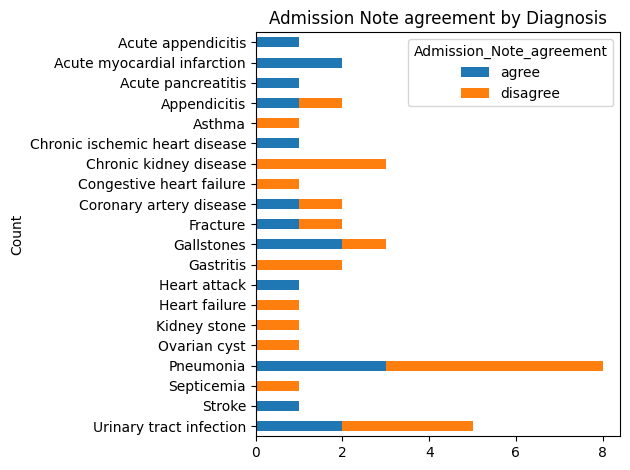

In [18]:
def plot_stacked_chart(output, variable_):
    
    df_stacked = output[output.Admission_Note_agreement != 'failed on json argument'].pivot_table(index='Medical_Condition_adj', 
                                columns=variable_ , 
                                aggfunc='size',
                                fill_value=0)

    ax = df_stacked[::-1].plot(kind='barh', stacked=True)

    ax.set_title(variable_.replace('_', ' ') + ' by Diagnosis')
    ax.set_ylabel('Count')
    plt.tight_layout()
    plt.show()

plot_stacked_chart(output, 'Admission_Note_agreement')


The high prevalance of pneumonia seems unlikely. I was curious to see if this is a default choice by age band. Approximately similar to last experiment. 

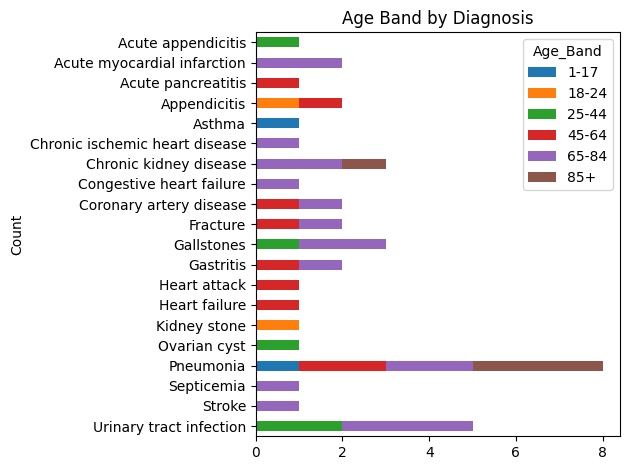

In [19]:
plot_stacked_chart(output, 'Age_Band')

Looking at whether surgical admissions (according to the original dataset) have been routed toward surgical treatments. It seems unlikely that a UTI or gastritis require immediate surgery

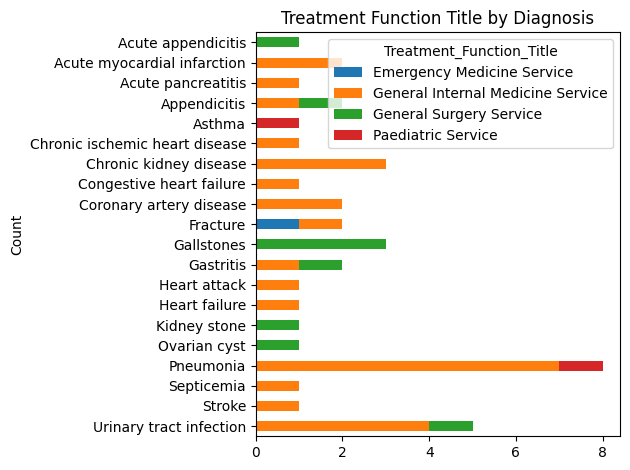

In [21]:
# output.head().T
plot_stacked_chart(output, 'Treatment_Function_Title')

Has the long prompt helped ChatGPT understand that the patient's condition is severe enough for admission? Here I'm showing the notes for patients who were said to have more than one diagnosis. This first note is quite vague. The agent in the third case has summarised the information about number of diagnoses given (reasonably) but I'm sure whether it used it for reasoning. 

In [49]:
output.loc[output.AE_Num_Diagnoses > 1, 'Admission_Note'].iloc[0]

for id, row in output.loc[output.AE_Num_Diagnoses > 1].iterrows():
    print(row.Medical_Condition)
    print(row.Admission_Note_agreement)
    print(row.Admission_Note)


Pneumonia
disagree
Chief Complaint: Patient presents with multiple symptoms that have not been classified elsewhere. History of Present Illness: Female patient in the 65-84 age group arrived in the A&E department mid-afternoon and was diagnosed with two conditions after undergoing 10 investigations and receiving 1 treatment. Patient was admitted under the General Internal Medicine Service. Past Medical History: No other medical history was disclosed at this time. Physical Examination: On admission, the patient was coherent, with vitals within normal range. Assessment: Based on the symptoms presented, the patient's condition requires inpatient care. Plan: The patient will be held in the General Internal Medicine ward of the hospital for further observation and testing to confirm the preliminary diagnoses
Septicemia
disagree
Chief Complaint: General weakness and malaise. History of Present Illness: The patient is a 70-year-old female who presents with general malaise and weakness. Over t